In [160]:
import time, os, re
import PersianCal
from tqdm import tqdm
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [60]:
iphone = 'product/dkp-2062220/گوشی-موبایل-اپل-مدل-iphone-11-pro-max-a2220-دو-سیم-کارت-ظرفیت-256-گیگابایت'
class_name = 'c-product__seller-price-raw js-price-value'

In [161]:
links_file = open("D:\iphone11.txt", 'r')
links = links_file.readlines()
links_file.close()

In [162]:
for i in range(len(links)):
    links[i] = links[i].replace("\n", "")
    links[i] += iphone

In [163]:
date_format = re.compile(r'\d\d\d\d\d\d\d\d')
dates = []
for i in range(len(links)):
    dates.append(date_format.findall(links[i])[0])

In [164]:
data = {"Date": dates}
df = pd.DataFrame(data)
df.Date = pd.to_datetime(df.Date, format = "%Y%m%d").dt.date

In [166]:
start_time = time.time()

prices = []
for i in tqdm(range(len(links))):
    req = requests.get(links[i])
    soup = BeautifulSoup(req.text, 'html')
    price_temp = soup.find("div", {"class": class_name}).text.split()[0]
    prices.append(int(price_temp.replace(",", "").replace(" ", "")))
    
print("--- {} seconds ---".format((time.time() - start_time)))

 26%|████████████████████▏                                                          | 316/1238 [18:44<54:41,  3.56s/it]


KeyboardInterrupt: 

In [167]:
df["Price"] = prices

ValueError: Length of values (316) does not match length of index (1238)

In [136]:
df.set_index("Date", inplace=True)

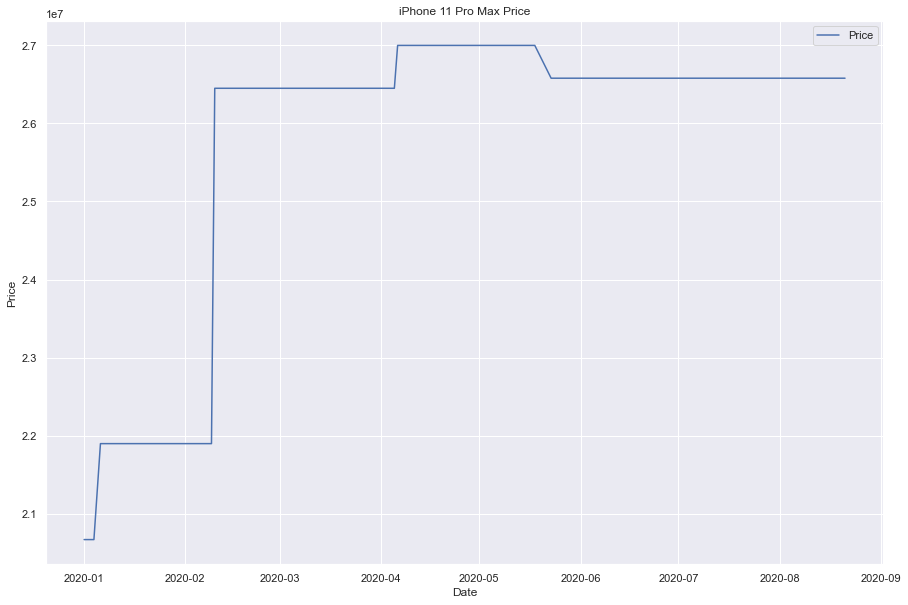

In [149]:
import seaborn as sns
sns.set()
ax = df.plot(figsize = (15, 10), title = "iPhone 11 Pro Max Price", ylabel = 'Price')
fig = ax.get_figure()
fig.savefig('iphone.png')

In [157]:
df.to_csv("D:\Stocks\iphone11promax.csv")